In [129]:
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# Set up the plotting template
pio.templates["custom"] = pio.templates["plotly"]
pio.templates["custom"].layout.margin = dict(l=0, r=0, t=50, b=0)
pio.templates.default = "custom"

# Moving Average Filter
A moving average filter is a very straightforward and easy to implement method for reducing noise in a signal. It is a type of finite impulse response (FIR) filter, meaning its impulse response is finite in duration. FIR filters are inherently stable.

Create a `N` point signal with random noise:

In [130]:
N = 1024
samples = np.arange(N)
input_signal = 1.0*np.sin(2*np.pi*1.2*samples/N) + \
               3.0*np.sin(2*np.pi*5.0*samples/N) + \
               2.0*np.random.rand(N) # Noise

Create the moving average filter of length `ma_size`.
The output signal obtained using a moving average filter is described by:
$$
y[n]=\sum_{k=0}^{N-1}h[k]\cdot x[n-k]
$$

where $h[k]=\frac{1}{N}$ for all $k$, $n$ is the index of the point in the input/output signals, and $N$ is the length of the moving average filter. $N$ is the number of points that will be used in the input signal for the averaging, within the range of $[n-N, n]$.

Between points $[0, N-1]$ in the input signal, there are more points in the filter kernel than we have available to use for the averaging. For this range of indices, we simply average up to $n$.

In [131]:
def moving_average(x, ma_size):
    h = 1 / ma_size
    ma = np.zeros(len(x))
    for n in range(len(x)):
        if n < ma_size-1:
            ma[n] = sum([h*x[n-j] for j in range(n)])
        else:
            ma[n] = sum([h*x[n-k] for k in range(ma_size)])
    return ma

Here we create a moving average using a 8 point filter kernel:

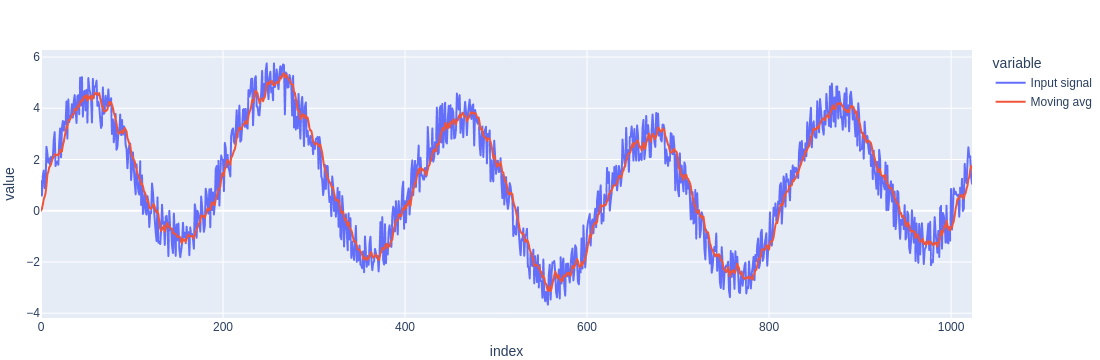

In [132]:
df = pd.DataFrame({ "Input signal": input_signal,
                    "Moving avg": moving_average(input_signal, 8) })

fig = px.line(df)
fig.show()

Now let's create a 55 point filter kernel and see what the output signal looks like:

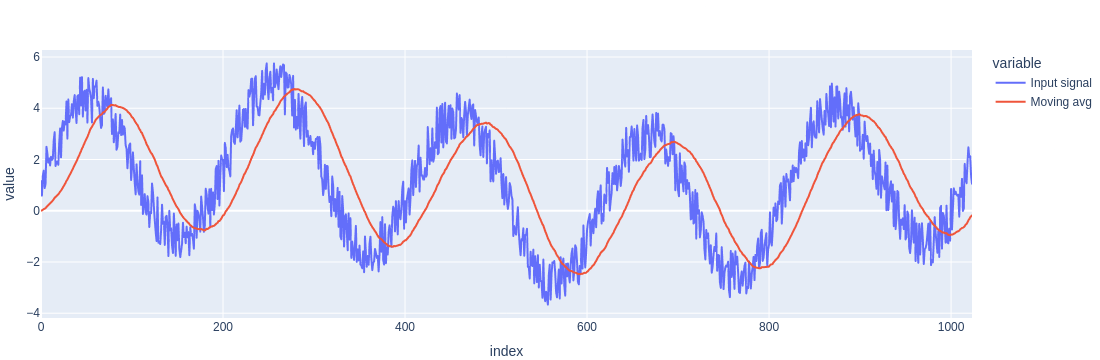

In [133]:
df["Moving avg"] = moving_average(input_signal, 55)
fig = px.line(df)
fig.show()

Notice that the resulting signal is much smoother, but due to the nature of the moving average filter, a phase lag has been introduced. The phase lag is equal to $\frac{N}{2}$ samples.